In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file = 'frozen_inference_graph.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
import cv2

# Full file paths
weights_path = r"C:\Users\harsh\OneDrive\Desktop\Project Object Detection\frozen_inference_graph.pb"
config_path  = r"C:\Users\harsh\OneDrive\Desktop\Project Object Detection\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

# Load the model correctly using TensorFlow-style loader
net = cv2.dnn.readNetFromTensorflow(weights_path, config_path)

# Wrap in DetectionModel


In [5]:
classLabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip().split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'googles', 'smart phone']


In [7]:
print(len(classLabels))

82


In [8]:
model = cv2.dnn_DetectionModel(net)
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000017765B85850>

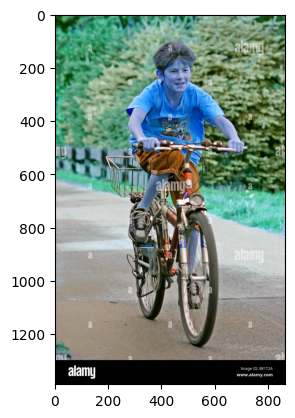

In [9]:
img = cv2.imread('boy.jpg')
plt.imshow(img)

In [10]:
classIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [11]:
print(classIndex)

[2 1 1]


In [12]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
    if ClassInd <= len(classLabels):
        cv2.rectangle(img, boxes, (255, 0, 0), 2)
        cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, font_scale, (255, 255, 255), 3)   

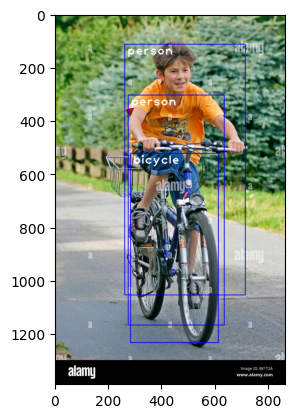

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# Video
cap = cv2.VideoCapture('pixels geoge morina.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)
    print(ClassIndex)
    
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= len(classLabels):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, font_scale, (255, 255, 255), 3)

            cv2.imshow('Object Detection', frame)

            if cv2.waitKey(2) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllWindows()

[ 1  1  1  3  2  1  1  1  1  2  1  1  1  1  2 10  1  6]
[1 1 1 1 2 2 2 1 1 1 1 1 3 1 1 1]
[ 1  1  1  1  2  2  1  1  2  3  1  1  1  1  1 10]
[ 1  1  1  2  1  2  1  2  1  3  1  1  1  1  3  1  3 10  1]
[ 1  1  2  2  1  1  2  1  1  1  1  1  1  1  1  1 10  1]
[ 1  1  2  1  2  1  3  2  1  1  1  1  1 10  1  1  1  1]
[ 1  1  2  1  1  1  3  1  1  1  3  1  1  1  2  1  3  1 10  2]
[ 2  1  1  3  1  1  1  1  2  1  1  1  2  3  1  3  1 10  1  1]
[ 1  1  2  1  1  2  1  1  1  3  2  1  1  1 10  1  1]
[ 1  1  1  2  1  2  2  1  3  1  1  1  1 10  1  1  1  3]
[ 1  1  1  3  1  2  2  2  1  1  1  1  3  1  1 10  1]
[ 1  1  1  2  2  3  2  1  1  3  1  1 10  1  1  1]
[ 1  1  3  1  1  2  1  2  1  2  1  3  1  1  1 10]
[ 1  1  1  2  3  1  1  2  2  1  3  1  1  1  1 10]
[ 1  2  1  1  2  1  2  3  1  1  1  1  1 10  1  1  3]
[ 1  2  1  1  2  1  2  3  1  1  1 10  1  1]
[ 1  2  1  2  1  1  2  1  3  1  1 10  1  1  1  3  1]
[ 1  2  2  1  1  1  2  1  1  1  1  1  3 10  1  1  1  1]
[ 1  2  1  2  1  2  1  1  1  1  1 10]
[ 1  2  1

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


: 

In [ ]:
import cv2

# web cam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    print(ClassIndex)
    
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= len(classLabels):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, font_scale, (255, 255, 255), 3)

            cv2.imshow('Object Detection', frame)

            if cv2.waitKey(2) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[77  1]
[1]
[1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[ 1 77]
[1]
[1]
[ 1 77]
[1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[1]
[1]
[1]
[1]
[ 1 77]
[1]
[1]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


KeyboardInterrupt: 